# Corner detection
 * [Harris Corner Detector](https://en.wikipedia.org/wiki/Harris_Corner_Detector)
 * [Shi-Tomasi](http://www.ai.mit.edu/courses/6.891/handouts/shi94good.pdf)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

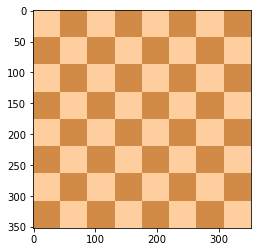

In [23]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

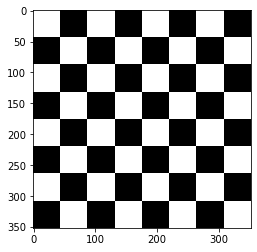

In [5]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_flat_chess, 'gray')

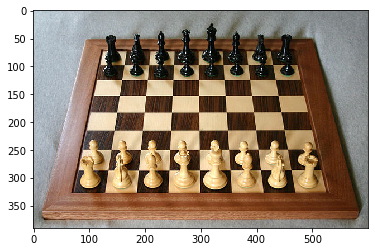

In [6]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

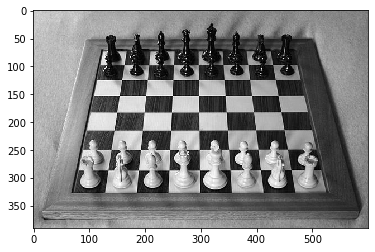

In [7]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_real_chess, 'gray')

## Harris corner detection algorithm

In [8]:
gray = np.float32(gray_flat_chess)
gray

array([[215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       ...,
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.]], dtype=float32)

In [9]:
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None) # For showing results

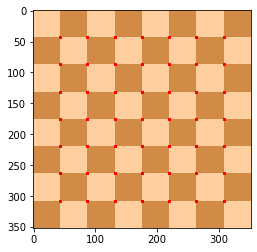

In [15]:
flat_chess[dst > 0.01*dst.max()] = [255, 0, 0] # RGB
plt.imshow(flat_chess)

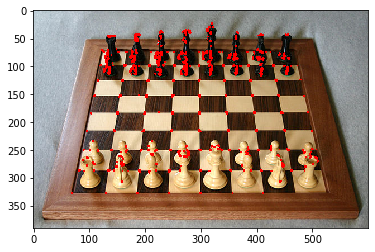

In [16]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None) # For showing results
real_chess[dst > 0.01*dst.max()] = [255, 0, 0] # RGB
plt.imshow(real_chess)

# Shi-Tomasi

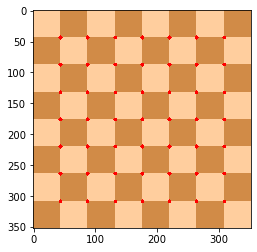

In [32]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 64, 0.01, 10)
# draw little circles
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)
plt.imshow(flat_chess)

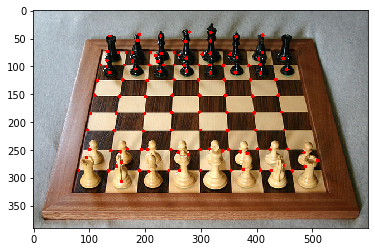

In [35]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)
corners = cv2.goodFeaturesToTrack(gray_real_chess, 120, 0.01, 10)
# draw little circles
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,(255,0,0),-1)
plt.imshow(real_chess)